## Instructions
- See deadline on the course web page
- This problem set is solved individually. See examination rules on the course web page and the explanation of the examination procedure below.
- The two notebooks for each problem set contain a number of basic and extra problems; you can choose which and how many to work on. The extra problems are usually more challenging.
- Students are allowed to discuss together and help each other when solving the problems. However, every student must understand their submitted solution in the sense that they should be able to explain and discuss them with a peer or with a teacher.
- While discussions with your peers are allowed (and even encouraged), direct plagiarism is not. Every student must reach their own understanding of submitted solutions according to the definition in the previous point.
- The use of coding assistance from code generating artificial intelligence tools is allowed. However, every student must reach their own understanding of submitted solutions (including employed algorithms) according to the definition above.
- Some problems include checkpoints in the form of `assert` statements. These usually check some basic functionality and you should make sure that your code passes these statements without raising an `AssertionError`. 
- Do not use other python modules than the ones included in the `environment.yml` file in the course github repo. 

- **Important:** The grading of problem sets requires **all** of the following actions:
  1. Make sure to always complete **Task 0** in the header part of the notebook and that this part does not raise any `AssertionError`(s).
  1. **Complete** the corresponding questions in Yata for every task that you have completed. This usually involves copying and pasting some code from your solution notebook and passing the code tests. You need to have a green check mark on Yata to get the corresponding points.
  1. **Upload** your solution in the form of your edited version of this Jupyter notebook via the appropriate assignment module in Canvas (separate for basic and extra tasks). It is the code and results in your submitted notebook that is considered to be your hand-in solution.
  1. If selected, be **available for a discussion** of your solution with one of the teachers on the Monday afternoon exercise session directly following the problem set deadline. No extra preparation is needed for these discussions apart from familiarity with your own solution. A list of randomly selected students will be published on the course web page around Monday noon. During the afternoon session that same day, students will be called in the numbered order until the end of the list (or the end of the exercise session). You must inform the responsible teacher as soon as possible following the publication of the student list if you can not be physically present at the exercise session (in which case we will have the discussion on zoom). An oral examination (on all aspects of the course) will be arranged during the exam week for students that do not show up for their discussion slot, or that fail to demonstrate familiarity with their hand-in solutions.

- Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

- Make sure that the **run time is smaller than a few minutes**. If needed you might have to reduce some computational tasks; e.g. by decreasing the number of grid points or sampling steps. Please ask the supervisors if you are uncertain about the run time. 

- Your solutions are usually expected where it says `YOUR CODE HERE` or <font color="red">"PLEASE WRITE YOUR ANSWER HERE"</font>.

### Task 0 
#### (0 points)

By changing the below boolean variable `student_self_assessment` to `True` you attest that:
- All handed in solutions were produced by yourself in the sense that you understand your solutions and should be able to explain and discuss them with a peer or with a teacher.


In [1]:
student_self_assessment = True

# 
# YOUR CODE HERE
# 

In [2]:
assert student_self_assessment == True, 'You must assert the individual solution statements.'

# Problem Set 1 (Extra problems)
**Learning from data [TIF285], Chalmers, Fall 2024**

Last revised: 1-Sep-2024 by Christian Forssén [christian.forssen@chalmers.se]

In [3]:
# Data directory
DATA_ID = "DataFiles/"

# import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 
# YOUR CODE HERE
# 

## Problem 5 [extra] (3 points; manually graded)

### Gradient-descent variants
*You should have solved problem 3 before doing this problem.*

Write a python class for setting up and optimizing the linear-regression model used in Problem 2 and functionality for performing stochastic and mini-batch gradient descent. Start from the template provided below. You can assume that there is one independent variable (x) and one response variable (y).

In [4]:
class LinearRegression:
    def __init__(self, xdata, ydata, polynomial_order):
        """
        Setup a polynomial model.
        
        Args:
            xdata: array of independent variables
            ydata: array of response variables
            polynomial_order: integer, degree of polynomial

        Attributes:
            xdata: data set, array of input independent variables
            ydata: data set, array of response variables
            num_data: integer, length of data set
            polynomial_order: integer, degree of polynomial
            num_parameters: total number of model parameters
            data_design_matrix: array of shape (len(xdata), num_parameters)
                design_matrix corresponding to data set
            theta: current values of model parameters, array of length `num_parameters`
            
        """
        self.xdata = np.array(xdata).reshape(-1, 1)
        self.ydata = np.array(ydata).reshape(-1, 1)
        assert self.xdata.shape[0]==self.ydata.shape[0]
        self.num_data = self.ydata.shape[0]
        self.polynomial_order = polynomial_order
        self.num_parameters = polynomial_order + 1
        assert self.num_parameters <= self.num_data
        self.data_design_matrix = self.create_polynomial_design_matrix(self.xdata)
        self.theta = np.random.uniform(size=self.num_parameters)

    def create_polynomial_design_matrix(self, xdata):
        """
        Create a design matrix for a polynomial model, and return it.
        
        Args:
            xdata: array of independent variables

        Returns:
            design_matrix: design_matrix, array of shape (len(xdata), num_parameters)
        """
        # 
        # YOUR CODE HERE
        # 

        return np.vander(xdata.reshape(-1,1)[:,0], self.polynomial_order+1, increasing=True)

    def predict(self, xpred):
        """
        Perform a prediction, y_pred = X_pred \theta.

        Args:
            xpred: array of independent variables

        Returns:
            ypred: array of predicted response variables
        """
        # 
        # YOUR CODE HERE
        # 

        return x_pred @ self.theta

    def solve_normal_equation(self):
        """
        Solves the normal equation and updates the parameters theta.

        Attributes:
            theta_fit: Optimized parameters from solving the normal equation (array)
        """
        # 
        # YOUR CODE HERE
        # 

        self.theta = np.linalg.inv(self.data_design_matrix.T @ self.data_design_matrix) @ self.data_design_matrix.T @ self.ydata
        self.theta_fit = self.theta

        return self.theta

    def gradient(self, xdata, ydata, theta):
        """
        Setup the cost function with the input data and computes its gradient with regards to the model parameters at the specific point.

        Args:
            xdata: array of independent variables that defines the cost function
            ydata: array of response variables that defines the cost function
            theta: current values of model parameters

        Returns:
            grad_theta: array, gradient vector
        """
        # 
        # YOUR CODE HERE
        # 
        
        cost_function = (ydata - self.create_polynomial_design_matrix(xdata) @ theta).T \
            @ (ydata - self.create_polynomial_design_matrix(xdata) @ theta)
        
        m = len(self.ydata)
        gradient = - 2/m * self.create_polynomial_design_matrix(xdata).T @ (ydata - self.create_polynomial_design_matrix(xdata) @ self.theta)

        return gradient

    def bgd_optimize(self, theta_start, n_epochs=1000, learning_rate=0.1):
        """
        Find optimized parameters using (batch) gradient descent.

        Uses all data in `xdata`, `ydata` attributes and starts from the position theta_start.
    
        Args:
            theta_start: starting guess for model parameters
            n_epochs: Number of epochs (default 1000) (integer)
            learning_rate: learning rate (default 0.1) (float)
                  
        Attributes:
            theta_bgd: Optimized parameters from batch gradient descent (array)
            theta_bgd_history: array of shape (n_epochs+1, self.num_parameters)
                History of parameter updates. Includes the start vector.
        """
        # 
        # YOUR CODE HERE
        # 

        self.theta = np.array(theta_start).reshape(-1,1)
        self.theta_bgd_history = self.theta.T
        for _ in range(n_epochs):
            self.theta = self.theta - learning_rate * self.gradient(self.xdata, self.ydata, self.theta)
            self.theta_bgd_history = np.vstack((self.theta_bgd_history, self.theta.T))
        
        self.theta_bgd = self.theta

    def sgd_optimize(self, theta_start, n_epochs=1000, learning_rate=0.01):
        """
        Find optimized parameters using stochastic gradient descent.

        Uses all data in `xdata`, `ydata` attributes and starts from the position theta_start.
    
        Args:
            theta_start: starting guess for model parameters
            n_epochs: Number of epochs (default 1000) (integer)
            learning_rate: learning rate (default 0.1) (float)
                  
        Attributes:
            theta_sgd: Optimized parameters from stochastic gradient descent (array)
            theta_sgd_history: array of shape (n_epochs+1, self.num_parameters)
                History of parameter updates. Includes the start vector.
        """
        # 
        # YOUR CODE HERE
        # 
        
        rng = np.random.default_rng(seed=42)

        self.theta = np.array(theta_start).reshape(-1,1)
        self.theta_sgd_history = self.theta.T

        for _ in range(n_epochs):
            permutation = rng.permutation(len(self.ydata))
            self.xdata = self.xdata[permutation]
            self.ydata = self.ydata[permutation]
            zipped_data = list(zip(self.xdata, self.ydata))
            for data_instance in zipped_data:
                self.theta = self.theta - learning_rate * self.gradient(data_instance[0], data_instance[1], self.theta)
                self.theta_sgd_history = np.vstack((self.theta_sgd_history, self.theta.T))

        self.theta_sgd = self.theta
    
    def mbgd_optimize(self, theta_start, n_epochs=1000, learning_rate=0.01, batch_size=0.2):
        """
        Find optimized parameters using stochastic gradient descent.

        Uses all data in `xdata`, `ydata` attributes and starts from the position theta_start.
    
        Args:
            theta_start: starting guess for model parameters
            n_epochs: Number of epochs (default 1000) (integer)
            learning_rate: learning rate (default 0.1) (float)
            batch_size: maximum fraction of data in each mini batch (default 0.2) (float < 1.0)
                  
        Attributes:
            theta_mbgd: Optimized parameters from mini-batch gradient descent (array)
            theta_mbgd_history: array of shape (n_epochs+1, self.num_parameters)
                History of parameter updates. Includes the start vector.
        """
        # 
        # YOUR CODE HERE
        # 

        def get_batches(data, batch_size):
            for i in range(0, len(data), int(np.round(batch_size))):
                yield data[i:i+int(np.round(batch_size))]
        
        rng = np.random.default_rng(seed=42)

        self.theta = np.array(theta_start).reshape(-1,1)
        self.theta_mbgd_history = self.theta.T

        data_size = len(self.ydata)
        batch_size = int(np.round(batch_size * data_size))
        if batch_size == 0:
            batch_size = 1
        for _ in range(n_epochs):
            permutation = rng.permutation(len(self.ydata))
            self.xdata = self.xdata[permutation]
            self.ydata = self.ydata[permutation]
            zipped_data = list(zip(self.xdata, self.ydata))
            for data_batch in get_batches(zipped_data, batch_size):
                xdata_batch = np.array(list(zip(*data_batch))[0])
                ydata_batch = np.array(list(zip(*data_batch))[1])
                self.theta = self.theta - learning_rate * self.gradient(xdata_batch, ydata_batch, self.theta)
                self.theta_mbgd_history = np.vstack((self.theta_mbgd_history, self.theta.T))
                
        self.theta_mbgd = self.theta


### (a) Batch and stochastic gradient descent

Implement both batch, stochastic, and mini-batch gradient descent and use these methods to find the best fit parameters of a quadratic model. Make sure that you also save the convergence path, i.e., how the parameters change as a function of iteration number. 

Concerning batch gradient descent you can re-use the methods that you implemented in Problem 2, with relevant modifications to incorporate them in the `LinearRegression` class. Note the use of `n_epochs` as an argument to make results comparable between different algorithms.

* You might want to tune the learning hyperparameter as it can be smaller when you do many parameter updates for each epoch.
* Do 1000 epochs (each epoch corresponding to using all instances of data once).
* Use a mini-batch size of 20% for MBGD.
* Start from `[0., 0., 0.]`.
* Compare with the solution from Problem 2.
* hint: the `permutation` method from `numpy.random` might be useful. The recommended procedure for random number sampling is to create a `Generator` instance with `numpy.random.default_rng` and call the relevant methods as attributes to this instance. 

In [5]:
# Read the data from Problem 2, initialize the quadratic model, and find the best fit parameters using
# Normal equation, BGD, SGD, MBGD
# Compare the final parameter values

filename = f'{DATA_ID}PS1_Prob3_data.txt'
data = np.loadtxt(filename)
xdata = data[:,0]
ydata = data[:,1]

# 
# YOUR CODE HERE
# 

theta_start = [0. ,0. ,0.]

bgd_epochs = 1000
sgd_epochs = int(bgd_epochs/len(ydata))
mbgd_batch_size = 0.2
mbgd_epochs = int(bgd_epochs*mbgd_batch_size)

model = LinearRegression(xdata, ydata, 2)
model.solve_normal_equation()
model.bgd_optimize(theta_start, n_epochs=bgd_epochs, learning_rate=0.1)
model.sgd_optimize(theta_start, n_epochs=sgd_epochs, learning_rate=6)
model.mbgd_optimize(theta_start, n_epochs=mbgd_epochs, learning_rate=1, batch_size=mbgd_batch_size)

indices = list([fr'$\theta_{i}$' for i in range(3)]) + ['N_epochs (using every data point once)'] + ['Total epochs']

epochs = ['-', len(model.theta_bgd_history)-1, len(model.theta_sgd_history)-1, 
        len(model.theta_mbgd_history)-1]

result_list = [list(model.theta_fit[:,0])+['-']+[epochs[0]], 
                list(model.theta_bgd[:,0])+[str(bgd_epochs)]+[epochs[1]], 
                list(model.theta_sgd[:,0])+[str(sgd_epochs)]+[epochs[2]], 
                list(model.theta_mbgd[:,0])+[str(mbgd_epochs)]+[epochs[3]]]

results = pd.DataFrame(result_list, columns=indices, index=['Normal Equation', 'BGD', 'SGD', 'MBGD'])
display(results)

,$\theta_0$,$\theta_1$,$\theta_2$,N_epochs (using every data point once),Total epochs
Normal Equation,0.206612,1.108875,0.697434,-,-
BGD,0.219742,1.073539,0.714668,1000,1000
SGD,0.248515,1.065845,0.862903,10,1000
MBGD,0.204221,1.105335,0.693310,200,1000


### (b) Convergence
Compare the convergence pattern for the BGD, SGD and MBGD, i.e. plot the path towards the optimal set of parameters as a function of the epochs. 
- You can start from $\theta=(0,0,0)$ with all three GD algorithms.
- Note that the path is in 3D (since there are three parameters in our quadratic model). You should plot the three different 2D projections of the path (you might want to select the plot range such that the difference convergence behaviors can be seen).
- Indicate also the true optimum (as found by solving the normal equation).

For full points you should also comment on your results. 
- What are the main features of the different algorithms? 
- Did you use different learning rates for the different algorithms (if so, why?). 

Write your commentary in a markdown cell.

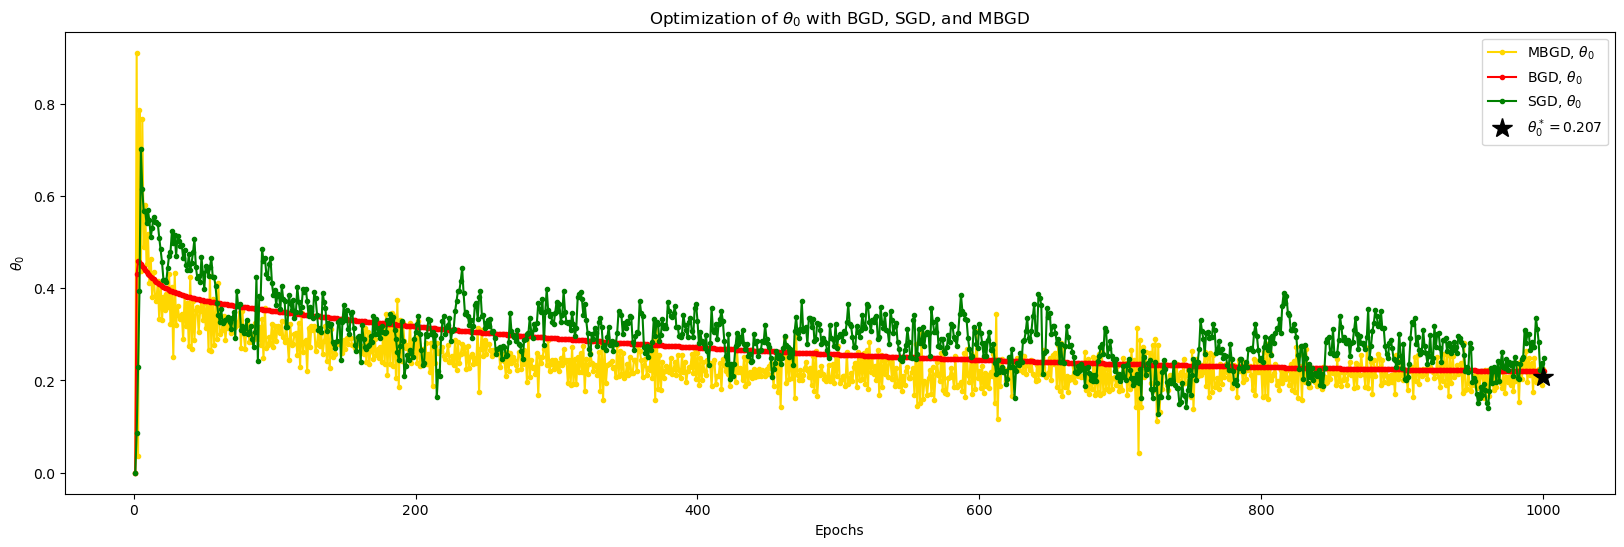

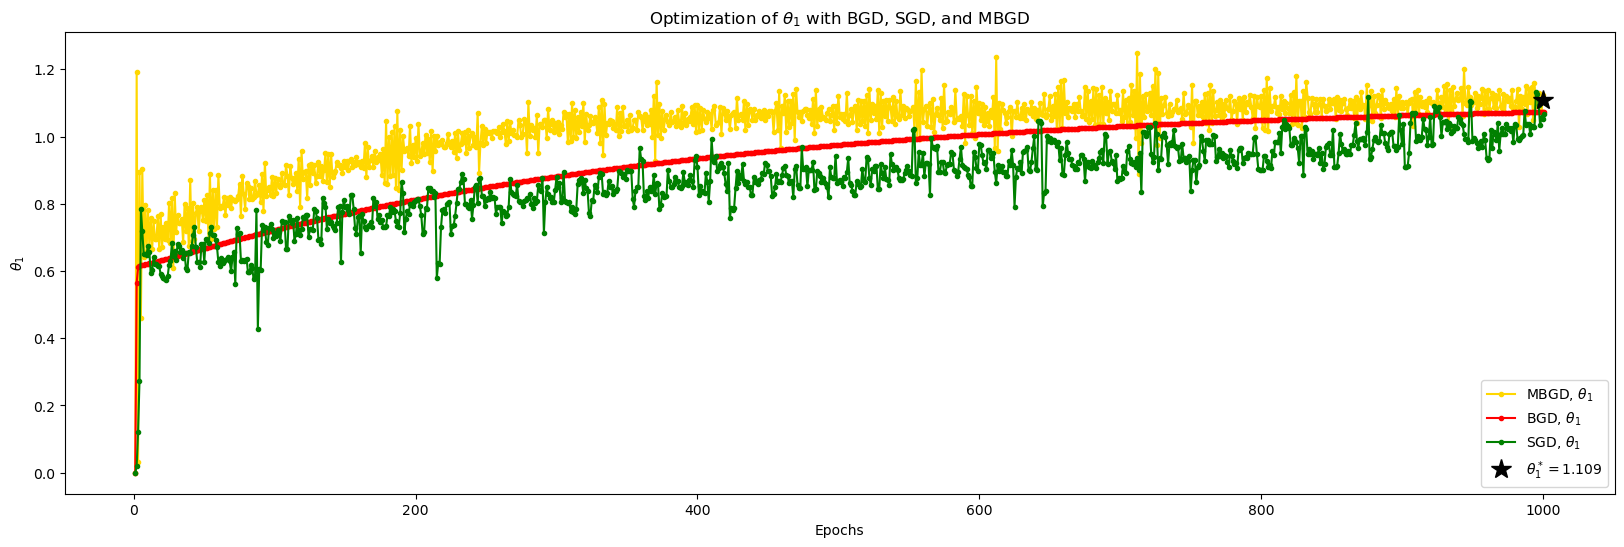

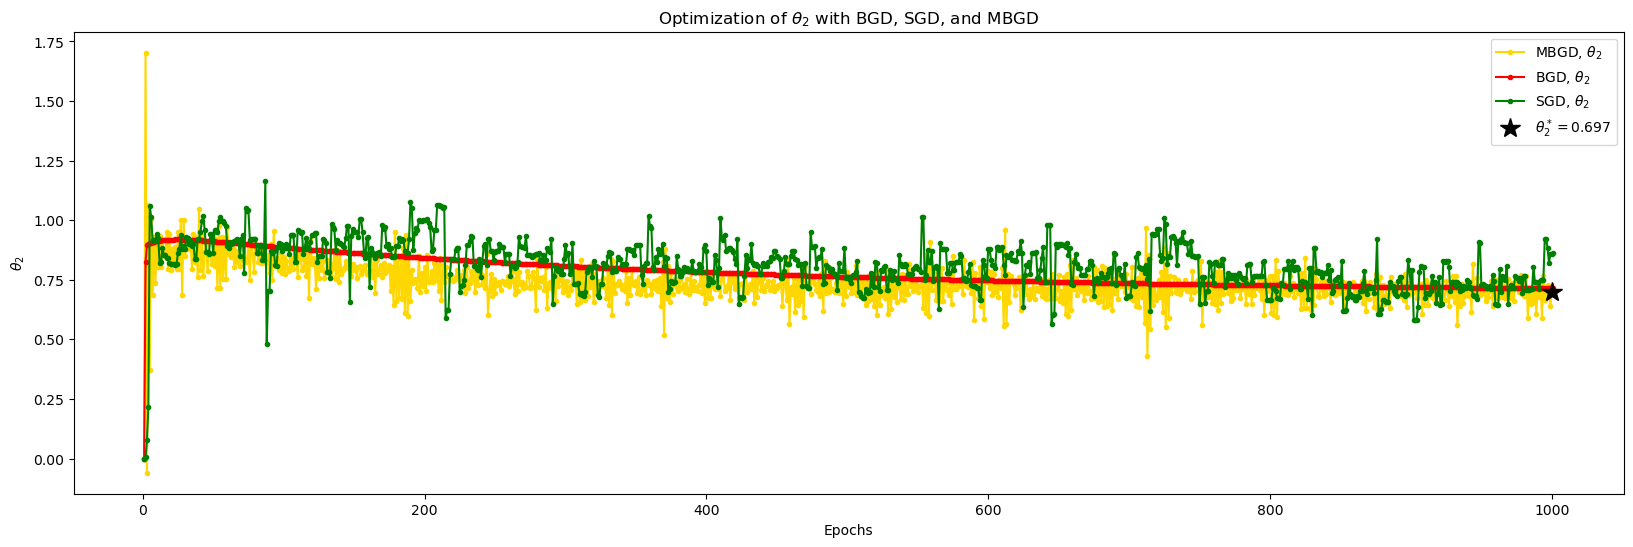

In [6]:
# 
# YOUR CODE HERE
# 

theta_star = model.theta_fit[:,0]
bgd_history = model.theta_bgd_history
sgd_history = model.theta_sgd_history
mbgd_history = model.theta_mbgd_history
    
for i in range(model.num_parameters):
    fig = plt.figure(figsize=(20, 6))
    
    plt.plot(np.linspace(1, mbgd_history.shape[0], mbgd_history.shape[0]), mbgd_history[:,i], '-o', color='gold', markersize=3, label=f'MBGD, $\\theta_{i}$')
    plt.plot(np.linspace(1, bgd_history.shape[0], bgd_history.shape[0]), bgd_history[:,i], 'r-o', markersize=3, label=f'BGD, $\\theta_{i}$')
    plt.plot(np.linspace(1, sgd_history.shape[0], sgd_history.shape[0]), sgd_history[:,i], 'g-o', markersize=3, label=f'SGD, $\\theta_{i}$')
    
    plt.plot(bgd_epochs, model.theta_fit[i], 'k*', label=f'$\\theta_{i}^*={theta_star[i]:.3f}$', markersize=15)
    plt.legend()
    plt.ylabel(f'$\\theta_{i}$')
    plt.xlabel('Epochs')
    plt.title(f'Optimization of $\\theta_{i}$ with BGD, SGD, and MBGD')
    
plt.show()

### What are the main features of the different algorithms? 
In general, or in the big picture, the different algorithms works in the same way. However, some things differ between them. For large data sets, BGD can be a bit slow since it uses all the data. On the other hand, the variance between each iteration is often rather small since we compute the exact gradient and not only parts of it as in the other models. Can get stuck in local minimas

Compared to BGD, which uses the whole data set every iteration, SGD and MBGD uses a smaller part of the data. The main reason behind this is to insert some noice so that they can easier escape local minimas. For SGD, that uses every data point in the whole set each iteration, it is also faster for large data sets as it does not need to go through the whole data at once. However, SGD can get too noisy and lead to oscillations around the minima, never converging exacly to it. To some extent, this can be avoided with choosing the learning parameter smart (see below).

MBGD however, in theory takes the best of BGD and SGD, evaluating the gradient for a certain number of data points every iteration. This gives us the benefits of SGD explained above, while not being too noicy, i.e. converging better, reducing variance for each update more like BGD. 

I think these aspects of the algorithms are well shown in my plot examples above, where BGD converges better (less spread between updates), while SGD gets a bit too noicy and does not hit the minima every time for the learning rate used. Then MBGD acts like a mix between those, converging more like BGD, having a spread between BGD and SGD while also having the efficiency pros of SGD compared to BGD (BGD uses N_epochs = 1000, while SGD has N_epochs = 10 and MBGD N_epochs = 200).

### Did you use different learning rates for the different algorithms (if so, why?)

Yes I did. In general, I found the following guidelines concerning the learning rate when using BGD, SGD and MBGD:

| Learning rate $\eta$ | Convergence Stability | Time to Converge |
| -------------------- | --------------------- | ---------------- |
| Smaller              | More stable, better convergence | Longer |
| Larger               | More oscillations, less stable | Shorter |

The trade-off with the learning rate is between stability (smooth convergence) and the speed of finding the optimum. A smaller $\eta$ reduces the spread of updates in each iteration, leading to more stable convergence but taking longer to reach the minimum. On the other hand, a larger $\eta$ leads to faster updates, but at the cost of potential oscillations around the optimum or even divergence.

#### Learning Rate Choice

- BGD ($\eta = 0.1$) For Batch Gradient Descent, I used a relatively small learning rate because the algorithm updates the parameters using the entire dataset in each iteration. Going higher than $\eta = 0.1$ caused divergence in my tests, so this was the largest value that offered stability and fast convergence.

- SGD ($\eta = 6$) Stochastic Gradient Descent can tolerate a larger learning rate because it introduces noise by using only one sample at a time. This noise can prevent the algorithm from getting stuck in local minima, allowing for larger steps ($\eta$). However, with a very high learning rate, I noticed significant oscillations, which are expected due to the stochastic nature. A smaller $\eta$ led to very slow convergence and often failed to reach the same optimum as BGD.

- MBGD ($\eta = 1$) Mini-Batch Gradient Descent is a balance between BGD and SGD, so I used a learning rate that is higher than BGD but lower than SGD. The mini-batches reduce the noise compared to SGD, allowing for more stable convergence. I still observed some oscillations, but they were less severe compared to SGD.

Similarly to BGD, I can say that the values of $\eta = 6$ and $\eta = 1$ was the highest (almost at least for SGD) you could go before divergence for these algorithms as well, so these offered the faster convergence and got the best parameter results, even though it would be more accurate (but take longer time) to use a smaller $\eta$ for these algorithms. 

Since SGD and MBGD oscillate, an interesting idea could be to (for these values of $\eta$), do like 100 optimizations and then take the average value of $\theta$ in the end, but that idea is only mine and I do not know if it would work:).

**I used the same rng-seed for both SGD and MBGD for comparison.**

## Problem 6 [extra] (3 points; manually graded)

### Adam
Repeat Problem 5 but implement also the Adam optimizer (see the lecture notes) into the `LinearRegression` class.

For full points you should also comment on your results. 
- What behaviour do you observe for the convergence of the Adam optimizer? 
- What behaviour do you observe for the learning rate of the Adam optimizer?

Write your commentary in a markdown cell.

In [7]:
class LinearRegression:
    def __init__(self, xdata, ydata, polynomial_order):
        """
        Setup a polynomial model.
        
        Args:
            xdata: array of independent variables
            ydata: array of response variables
            polynomial_order: integer, degree of polynomial

        Attributes:
            xdata: data set, array of input independent variables
            ydata: data set, array of response variables
            num_data: integer, length of data set
            polynomial_order: integer, degree of polynomial
            num_parameters: total number of model parameters
            data_design_matrix: array of shape (len(xdata), num_parameters)
                design_matrix corresponding to data set
            theta: current values of model parameters, array of length `num_parameters`
            
        """
        self.xdata = np.array(xdata).reshape(-1, 1)
        self.ydata = np.array(ydata).reshape(-1, 1)
        assert self.xdata.shape[0]==self.ydata.shape[0]
        self.num_data = self.ydata.shape[0]
        self.polynomial_order = polynomial_order
        self.num_parameters = polynomial_order + 1
        assert self.num_parameters <= self.num_data
        self.data_design_matrix = self.create_polynomial_design_matrix(self.xdata)
        self.theta = np.random.uniform(size=self.num_parameters)

    def create_polynomial_design_matrix(self, xdata):
        """
        Create a design matrix for a polynomial model, and return it.
        
        Args:
            xdata: array of independent variables

        Returns:
            design_matrix: design_matrix, array of shape (len(xdata), num_parameters)
        """
        # 
        # YOUR CODE HERE
        # 

        return np.vander(xdata.reshape(-1,1)[:,0], self.polynomial_order+1, increasing=True)

    def predict(self, xpred):
        """
        Perform a prediction, y_pred = X_pred \theta.

        Args:
            xpred: array of independent variables

        Returns:
            ypred: array of predicted response variables
        """
        # 
        # YOUR CODE HERE
        # 

        return x_pred @ self.theta

    def solve_normal_equation(self):
        """
        Solves the normal equation and updates the parameters theta.

        Attributes:
            theta_fit: Optimized parameters from solving the normal equation (array)
        """
        # 
        # YOUR CODE HERE
        # 

        self.theta = np.linalg.inv(self.data_design_matrix.T @ self.data_design_matrix) @ self.data_design_matrix.T @ self.ydata
        self.theta_fit = self.theta

        return self.theta

    def gradient(self, xdata, ydata, theta):
        """
        Setup the cost function with the input data and computes its gradient with regards to the model parameters at the specific point.

        Args:
            xdata: array of independent variables that defines the cost function
            ydata: array of response variables that defines the cost function
            theta: current values of model parameters

        Returns:
            grad_theta: array, gradient vector
        """
        # 
        # YOUR CODE HERE
        # 

        cost_function = (ydata - self.create_polynomial_design_matrix(xdata) @ theta).T \
            @ (ydata - self.create_polynomial_design_matrix(xdata) @ theta)
        
        m = len(self.ydata)

        gradient = - 2/m * self.create_polynomial_design_matrix(xdata).T @ (ydata - self.create_polynomial_design_matrix(xdata) @ self.theta)
        
        return gradient

    def bgd_optimize(self, theta_start, n_epochs=1000, learning_rate=0.1):
        """
        Find optimized parameters using (batch) gradient descent.

        Uses all data in `xdata`, `ydata` attributes and starts from the position theta_start.
    
        Args:
            theta_start: starting guess for model parameters
            n_epochs: Number of epochs (default 1000) (integer)
            learning_rate: learning rate (default 0.1) (float)
                  
        Attributes:
            theta_bgd: Optimized parameters from batch gradient descent (array)
            theta_bgd_history: array of shape (n_epochs+1, self.num_parameters)
                History of parameter updates. Includes the start vector.
        """
        # 
        # YOUR CODE HERE
        # 

        self.theta = np.array(theta_start).reshape(-1,1)
        self.theta_bgd_history = self.theta.T
        for _ in range(n_epochs):
            self.theta = self.theta - learning_rate * self.gradient(self.xdata, self.ydata, self.theta)
            self.theta_bgd_history = np.vstack((self.theta_bgd_history, self.theta.T))

            if abs(self.theta_fit - self.theta).all() < 1e-3:
                break
        
        self.theta_bgd = self.theta

    def sgd_optimize(self, theta_start, n_epochs=1000, learning_rate=0.01):
        """
        Find optimized parameters using stochastic gradient descent.

        Uses all data in `xdata`, `ydata` attributes and starts from the position theta_start.
    
        Args:
            theta_start: starting guess for model parameters
            n_epochs: Number of epochs (default 1000) (integer)
            learning_rate: learning rate (default 0.1) (float)
                  
        Attributes:
            theta_sgd: Optimized parameters from stochastic gradient descent (array)
            theta_sgd_history: array of shape (n_epochs+1, self.num_parameters)
                History of parameter updates. Includes the start vector.
        """
        # 
        # YOUR CODE HERE
        # 
        
        rng = np.random.default_rng(seed=42)

        self.theta = np.array(theta_start).reshape(-1,1)
        self.theta_sgd_history = self.theta.T

        for _ in range(n_epochs):
            permutation = rng.permutation(len(self.ydata))
            self.xdata = self.xdata[permutation]
            self.ydata = self.ydata[permutation]
            zipped_data = list(zip(self.xdata, self.ydata))
            for data_instance in zipped_data:
                self.theta = self.theta - learning_rate * self.gradient(data_instance[0], data_instance[1], self.theta)
                self.theta_sgd_history = np.vstack((self.theta_sgd_history, self.theta.T))

        self.theta_sgd = self.theta
    
    def mbgd_optimize(self, theta_start, n_epochs=1000, learning_rate=0.01, batch_size=0.2):
        """
        Find optimized parameters using stochastic gradient descent.

        Uses all data in `xdata`, `ydata` attributes and starts from the position theta_start.
    
        Args:
            theta_start: starting guess for model parameters
            n_epochs: Number of epochs (default 1000) (integer)
            learning_rate: learning rate (default 0.1) (float)
            batch_size: maximum fraction of data in each mini batch (default 0.2) (float < 1.0)
                  
        Attributes:
            theta_mbgd: Optimized parameters from mini-batch gradient descent (array)
            theta_mbgd_history: array of shape (n_epochs+1, self.num_parameters)
                History of parameter updates. Includes the start vector.
        """
        # 
        # YOUR CODE HERE
        # 

        def get_batches(data, batch_size):
            for i in range(0, len(data), int(np.round(batch_size))):
                yield data[i:i+int(np.round(batch_size))]
        
        rng = np.random.default_rng(seed=42)

        self.theta = np.array(theta_start).reshape(-1,1)
        self.theta_mbgd_history = self.theta.T

        data_size = len(self.ydata)
        batch_size = int(np.round(batch_size * data_size))
        if batch_size == 0:
            batch_size = 1
        for _ in range(n_epochs):
            permutation = rng.permutation(len(self.ydata))
            self.xdata = self.xdata[permutation]
            self.ydata = self.ydata[permutation]
            zipped_data = list(zip(self.xdata, self.ydata))
            for data_batch in get_batches(zipped_data, batch_size):
                xdata_batch = np.array(list(zip(*data_batch))[0])
                ydata_batch = np.array(list(zip(*data_batch))[1])
                self.theta = self.theta - learning_rate * self.gradient(xdata_batch, ydata_batch, self.theta)
                self.theta_mbgd_history = np.vstack((self.theta_mbgd_history, self.theta.T))
                
        self.theta_mbgd = self.theta

    def adam_optimize(self, theta_start, n_epochs=1000, learning_rate=0.01, gamma1=0.9, gamma2=0.999, eps=10e-8):
        """
        Find optimized parameters using Adam optimization. 

        Uses all data in `xdata`, `ydata` attributes and starts from the position theta_start.

        Args:
            theta_start: starting guess for model parameters
            n_epochs: Number of epochs (default 1000) (integer)
            learning_rate: learning rate (default 0.1) (float)
            gamma1: decay rate of the first moment (default 0.9) (float)
            gamma2: decay rate of the second moment (default 0.999) (float)
            eps: small number to prevent division by zero (default 10e-8) (float)
        
        Attributes:
            theta_adam: Optimized parameters from Adam optimization (array)
            theta_adam_history: array of shape (n_epochs+1, self.num_parameters)
                History of parameter updates. Includes the start vector.
        """
        # 
        # YOUR CODE HERE
        # 

        self.theta = np.array(theta_start).reshape(-1,1)
        self.theta_adam_history = self.theta.T
        
        m = np.zeros_like(self.theta)
        j = np.zeros_like(self.theta)
        #test = []
        for n in range(1, n_epochs+1):
            g = self.gradient(self.xdata, self.ydata, self.theta)
            m = gamma1*m + (1-gamma1)*g
            j = gamma2*j + (1-gamma2)*g**2
            m_hat = m / (1 - gamma1**n)
            j_hat = j / (1 - gamma2**n)
            #x = learning_rate * m_hat / (np.sqrt(j_hat) + eps)
            #x = list(x.reshape(-1))[0]
            #test.append(x)

            self.theta = self.theta - learning_rate * m_hat / (np.sqrt(j_hat) + eps)
            self.theta_adam_history = np.vstack((self.theta_adam_history, self.theta.T))
        #print(test)
        #plt.plot(test)
        self.theta_adam = self.theta

#model = LinearRegression(xdata, ydata, 2)
#model.solve_normal_equation()
#model.adam_optimize(theta_start, n_epochs=1000, learning_rate=1, gamma1=0.9, gamma2=0.999, eps=1e-8)
#print(model.theta_adam)
#plt.plot(model.theta_adam_history[:,0], label='Adam, $\\theta_0$')
#plt.plot(1000, model.theta_fit[:,0][0], 'k*', label='Normal Equation, $\\theta_0$', markersize=15)
#plt.plot(model.theta_adam_history[:,1], label='Adam, $\\theta_1$')
#plt.plot(model.theta_adam_history[:,2], label='Adam, $\\theta_2$')

In [8]:
filename = f'{DATA_ID}PS1_Prob3_data.txt'
data = np.loadtxt(filename)
xdata = data[:,0]
ydata = data[:,1]

# 
# YOUR CODE HERE
# 

theta_start = [0. ,0. ,0.]

bgd_epochs = 1000
sgd_epochs = int(bgd_epochs/len(ydata))
mbgd_batch_size = 0.2
mbgd_epochs = int(bgd_epochs*mbgd_batch_size)
adam_epochs = bgd_epochs

model = LinearRegression(xdata, ydata, 2)
model.solve_normal_equation()
model.bgd_optimize(theta_start, n_epochs=bgd_epochs, learning_rate=0.1)
model.sgd_optimize(theta_start, n_epochs=sgd_epochs, learning_rate=6)
model.mbgd_optimize(theta_start, n_epochs=mbgd_epochs, learning_rate=1, batch_size=mbgd_batch_size)
model.adam_optimize(theta_start, n_epochs=adam_epochs, learning_rate=1)

indices = list([fr'$\theta_{i}$' for i in range(3)]) + ['N_epochs (using every data point once)'] + ['Total epochs']

epochs = ['-', len(model.theta_bgd_history)-1, len(model.theta_sgd_history)-1, 
        len(model.theta_mbgd_history)-1, len(model.theta_adam_history)-1]

result_list = [list(model.theta_fit[:,0])+['-']+[epochs[0]], 
                list(model.theta_bgd[:,0])+[str(bgd_epochs)]+[epochs[1]], 
                list(model.theta_sgd[:,0])+[str(sgd_epochs)]+[epochs[2]], 
                list(model.theta_mbgd[:,0])+[str(mbgd_epochs)]+[epochs[3]],
                list(model.theta_adam[:,0])+[str(adam_epochs)]+[epochs[4]]]

results = pd.DataFrame(result_list, columns=indices, index=['Normal Equation', 'BGD', 'SGD', 'MBGD', 'Adam'])
display(results)

,$\theta_0$,$\theta_1$,$\theta_2$,N_epochs (using every data point once),Total epochs
Normal Equation,0.206612,1.108875,0.697434,-,-
BGD,0.219742,1.073539,0.714668,1000,1000
SGD,0.248515,1.065845,0.862903,10,1000
MBGD,0.204221,1.105335,0.693310,200,1000
Adam,0.206612,1.108875,0.697434,1000,1000


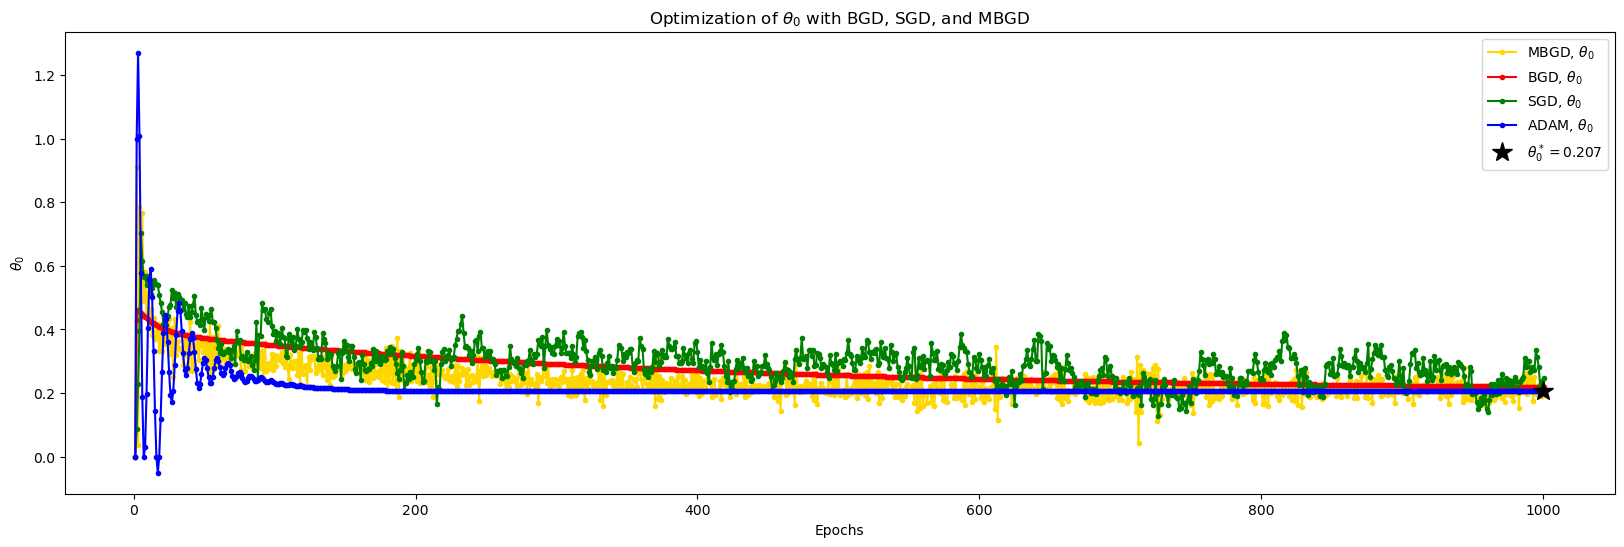

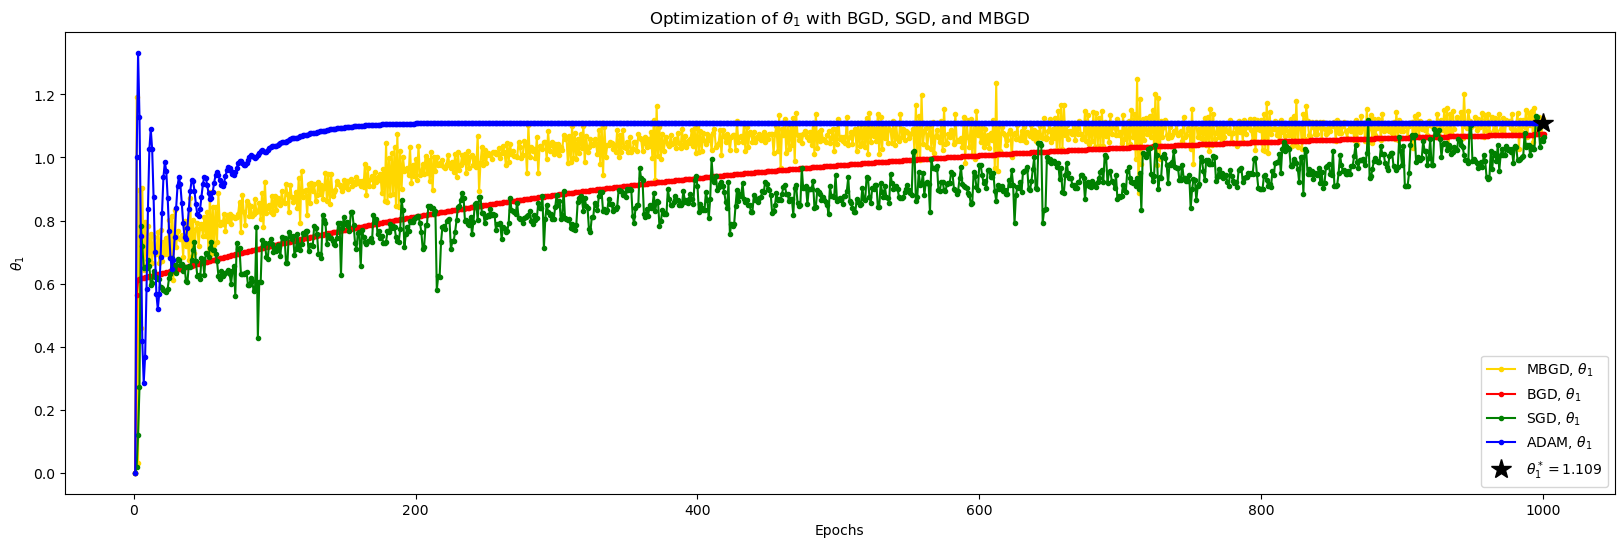

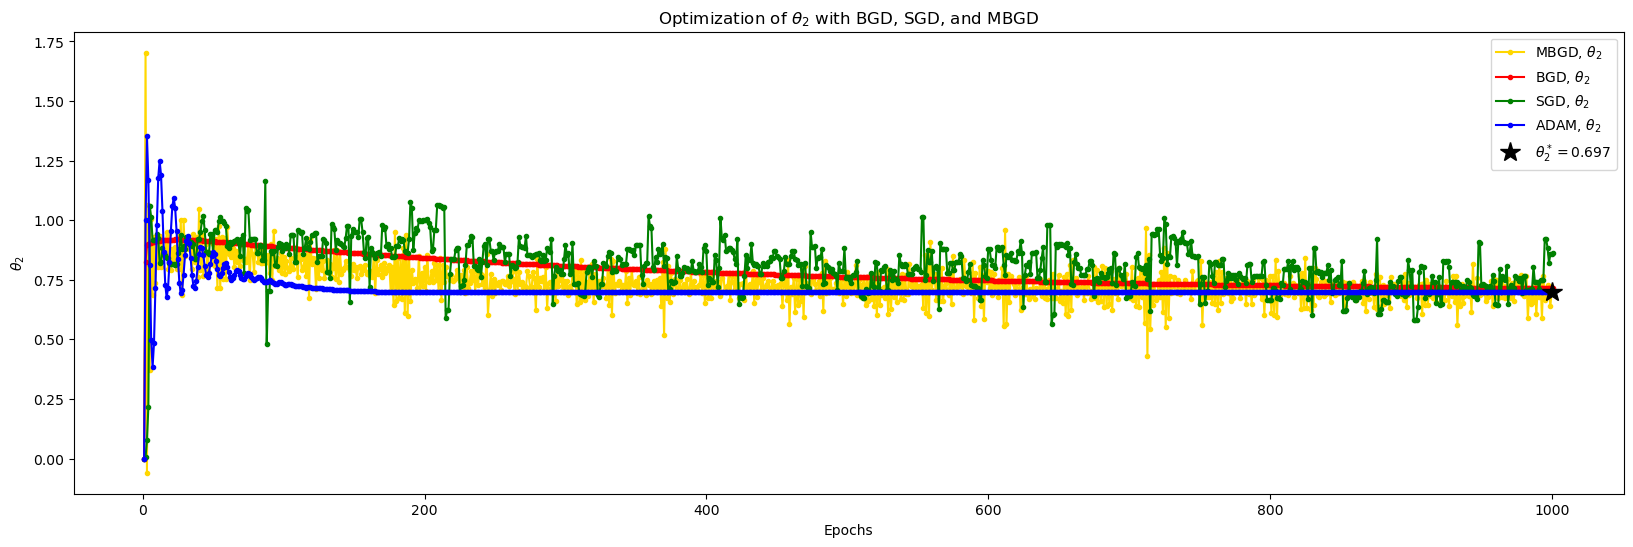

In [9]:
# 
# YOUR CODE HERE
# 

filename = f'{DATA_ID}PS1_Prob3_data.txt'
data = np.loadtxt(filename)
xdata = data[:,0]
ydata = data[:,1]

theta_start = [0. , 0. , 0.]

theta_star = model.theta_fit[:,0]

bgd_history = model.theta_bgd_history
sgd_history = model.theta_sgd_history
mbgd_history = model.theta_mbgd_history
adam_history = model.theta_adam_history

for i in range(model.num_parameters):
    fig = plt.figure(figsize=(20, 6))
    plt.plot(np.linspace(1, mbgd_history.shape[0], mbgd_history.shape[0]), mbgd_history[:,i], '-o', color='gold', markersize=3, label=f'MBGD, $\\theta_{i}$')
    plt.plot(np.linspace(1, bgd_history.shape[0], bgd_history.shape[0]), bgd_history[:,i], 'r-o', markersize=3, label=f'BGD, $\\theta_{i}$')
    plt.plot(np.linspace(1, sgd_history.shape[0], sgd_history.shape[0]), sgd_history[:,i], 'g-o', markersize=3, label=f'SGD, $\\theta_{i}$')
    plt.plot(np.linspace(1, adam_history.shape[0], adam_history.shape[0]), adam_history[:,i], '-o', color='blue', markersize=3, label=f'ADAM, $\\theta_{i}$')
    
    plt.plot(bgd_epochs, model.theta_fit[i], 'k*', label=f'$\\theta_{i}^*={theta_star[i]:.3f}$', markersize=15)
    plt.legend()
    plt.ylabel(f'$\\theta_{i}$')
    plt.xlabel('Epochs')
    plt.title(f'Optimization of $\\theta_{i}$ with BGD, SGD, and MBGD')

plt.show()

### What behaviour do you observe for the convergence of the Adam optimizer? 


### What behaviour do you observe for the learning rate of the Adam optimizer?

I noticed that, for this model at least, we need a learning rate larger than a certain value $\eta_{min}$, otherwise the ADAM optimizer will not find the optimum, for a certain number of epochs (if you have $\eta \leq \eta_{min}$ and you increase the number of epochs, ADAM will then find the optimum). However, this is probably reasonable in general since ADAM adapts the value of $\eta$ for each iteration, and if it is too small from the beginning, the updates will become too small as well and the model will take longer to converge to the optimum (and if you do not increase the epochs, it will not reach it at all, as I observe). I have not observed any upper limit for the value of $\eta$, but this probably depends on the model since a $\eta$ too large should result in diverging behaviour. 